In [3]:
%config Completer.use_jedi = False

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.io as pio

### Loading coordinates (lat, lon) of Brazilian urban areas in 2010 

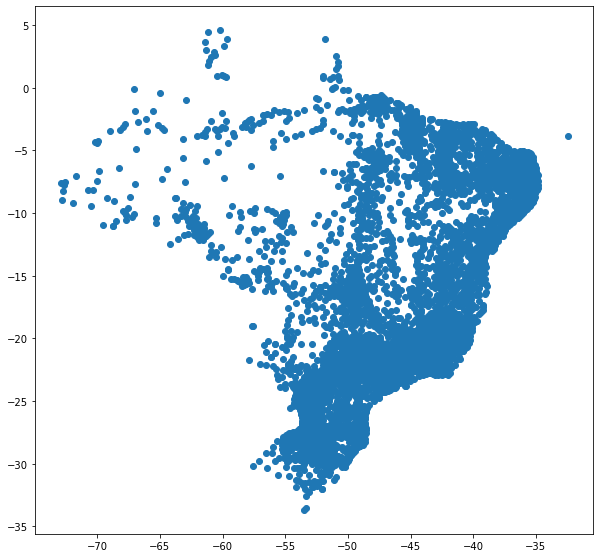

In [7]:
# loading the csv file with lat and long of the urban areas in 2010
df = pd.read_csv('data/lat long urban areas.csv', sep=',')
gdf = gpd.GeoDataFrame(df.iloc[:,:2], geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='EPSG:4674')
gdf.plot(figsize=(10,10));

### Loading Data of GDP Percapita and Population by urban areas in Brazil

In [8]:
# loading data of percapita GDP
df_percapita_gdp = pd.read_csv('data/per_capita_gdp_municipalities.csv')

C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (50) have mixed types.Specify dtype option on import or set low_memory=False.



In [9]:
# creating a dataframe with percapita gdp treated and suited to plot data as box plot
df_box_plot = df_percapita_gdp.set_index('cod_mun').loc[:,df_percapita_gdp.set_index('cod_mun').columns.str.startswith('percap_gdp_')]
df_box_plot.columns = df_box_plot.columns.str.replace('percap_gdp_', '')
df_box_plot = df_box_plot[['1920', '1939', '1949', '1959', '1970', '1980', '1996', '2000', '2010', '2018']]
df_box_plot = df_box_plot.reset_index().melt(id_vars=['cod_mun'], var_name='year', value_name='Per Capita GDP').dropna()
df_box_plot.columns = df_box_plot.columns.str.replace('percap_gdp_', '')


In [10]:
fig = px.histogram(
    data_frame=df_box_plot
    , x='Per Capita GDP'
    , facet_col='year'
    , facet_col_wrap=5
    , height=400
#, barmode="overlay"
    , range_x=(1_000,100_000)
    , range_y=(0,20)
    , title='Distribution of Per Capita GDP in the Brazilian Urban System (1920-2018)'
    #, log_y=True
    ,histnorm="percent"
    #, marginal="box"
)
fig.update_layout(margin={"r":2,"t":35,"l":10,"b":15})
fig

In [11]:
df_mean_std = df_box_plot.drop(columns=['cod_mun']).groupby(by='year').agg(['mean', 'std'])
df_mean_std.columns = ['mean', 'std']
df_mean_std.reset_index(inplace=True)
df_mean_std['1º Std'] = df_mean_std['mean'] + df_mean_std['std']
for column in ['mean', 'std', '1º Std']:
 df_mean_std[column] = np.floor(pd.to_numeric(df_mean_std[column], errors='coerce')).astype('Int64')

df_mean_std

year   mean    std  1º Std
0  1920   1757   1328    3086
1  1939   3829   2931    6761
2  1949   4853   4863    9716
3  1959   5254   6758   12013
4  1970   7052  22763   29815
5  1980  10606  22903   33509
6  1996   7760  13781   21541
7  2000  11442  13014   24457
8  2010   9891  21393   31285
9  2018  12008  23160   35169

In [12]:
fig = px.box(
    data_frame=df_box_plot
    , y='Per Capita GDP'
    , facet_col_wrap=5
    , height=400
    , boxmode="overlay"
#, points='outliers'
    , range_y=(0,40_000)
    , title='Distribution of Per Capita GDP in the Brazilian Urban System (1920-2018)'
#, log_y=True
#, facet_col='year'
    , x='year'
) 

fig.add_traces(
    list(px.line(data_frame=df_mean_std, y=['mean'], x='year', color_discrete_sequence=[px.colors.qualitative.Alphabet[24], px.colors.qualitative.Vivid[8]]).select_traces())
)
fig.update_layout(margin={"r":2,"t":35,"l":10,"b":15})

In [13]:
dict_upper_limit = {}
for year in ['1920', '1939', '1949', '1959', '1970', '1980', '1996', '2000', '2010', '2018']:
    iqr = df_percapita_gdp[f'percap_gdp_{year}'].quantile(0.75) - df_percapita_gdp[f'percap_gdp_{year}'].quantile(0.25)
    dict_upper_limit[year] = df_percapita_gdp[f'percap_gdp_{year}'].quantile(0.75) + (1.5 * iqr)


In [14]:
dict_upper_limit

{'1920': 3673.375,
 '1939': 8586.875,
 '1949': 13149.75,
 '1959': 13546.5,
 '1970': 15763.25,
 '1980': 23397.25,
 '1996': 17232.875,
 '2000': 24318.75,
 '2010': 23376.75,
 '2018': 29040.5}

In [15]:
df_percapita_gdp.set_index('cod_mun', inplace=True)
dict_index_outliers = {}
for year in ['1920', '1939', '1949', '1959', '1970', '1980', '1996', '2000', '2010', '2018']:
    dict_index_outliers[year] = df_percapita_gdp.loc[df_percapita_gdp[f'percap_gdp_{year}'] > dict_upper_limit[year]].index

In [16]:
dict_index_outliers['1920']

Int64Index([1100205, 1200500, 1200708, 1300409, 1300508, 1300706, 1301001,
            1301407, 1301605, 1301704, 1302405, 1302702, 1500206, 1500602,
            1501808, 1502509, 1503101, 1503309, 1503507, 1503606, 1504703,
            1504901, 1505809, 1506005, 1507607, 1600105, 2100501, 2101806,
            2105401, 2106102, 2109809, 2111706, 2205706, 2207603, 2408201,
            2410207, 2412500, 2607653, 2903904, 2906907, 2911709, 2914901,
            2920106, 3200607, 3205101, 3300209, 3302007, 3302502, 3302700,
            3304557, 3305208, 3305703, 3502705, 3502903, 3513009, 3513603,
            3538907, 3545209, 3550001, 4101804, 4103107, 4110102, 4116208,
            4117602, 4120606, 4127007, 4127809, 4203303, 4207205, 4208104,
            4209003, 4303509, 4314605, 5214606],
           dtype='int64', name='cod_mun')

In [17]:
df = df.set_index('cod_mun').join(
    other=[
        pd.qcut(df_percapita_gdp.percap_gdp_2018, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_2010, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_2000, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_1996, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_1980, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_1970, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_1959, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_1949, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_1939, 4, ['First', 'Second', 'Third', 'Fourth'])
        , pd.qcut(df_percapita_gdp.percap_gdp_1920, 4, ['First', 'Second', 'Third', 'Fourth'])
    ]
)

In [18]:
df

mun  longitude   latitude percap_gdp_2018  \
cod_mun                                                                
1100015  ALTA FLORESTA D'OESTE -61.999824 -11.935540          Second   
1100023              ARIQUEMES -63.033269  -9.908463           Third   
1100031                 CABIXI -60.544314 -13.499763          Second   
1100049                 CACOAL -61.442944 -11.433865           Third   
1100056             CEREJEIRAS -60.818426 -13.195033           Third   
...                        ...        ...        ...             ...   
5222005             VIANÓPOLIS -48.513471 -16.742081           Third   
5222054         VICENTINÓPOLIS -49.807239 -17.732662           Third   
5222203               VILA BOA -47.057361 -15.034889          Second   
5222302          VILA PROPÍCIO -48.882422 -15.454635          Fourth   
5300108               BRASÍLIA -47.887905 -15.794087          Fourth   

        percap_gdp_2010 percap_gdp_2000 percap_gdp_1996 percap_gdp_1980  \
cod_mun                                                                   
1100015           Third           Third           Third             NaN   
1100023           Third           Third          Fourth           Third   
1100031           Third          Fourth           Third             NaN   
1100049           Third           Third           Third          Fourth   
1100056           Third          Second           First             NaN   
...                 ...             ...             ...             ...   
5222005           Third           Third          Second          Second   
5222054           Third           Third           Third             NaN   
5222203           Third           First          Second             NaN   
5222302          Fourth          Fourth             NaN             NaN   
5300108          Fourth          Fourth          Fourth          Fourth   

        percap_gdp_1970 percap_gdp_1959 percap_gdp_1949 percap_gdp_1939  \
cod_mun                                                                   
1100015             NaN             NaN             NaN             NaN   
1100023             NaN             NaN             NaN             NaN   
1100031             NaN             NaN             NaN             NaN   
1100049             NaN             NaN             NaN             NaN   
1100056             NaN             NaN             NaN             NaN   
...                 ...             ...             ...             ...   
5222005          Second           Third          Fourth             NaN   
5222054             NaN             NaN             NaN             NaN   
5222203             NaN             NaN             NaN             NaN   
5222302             NaN             NaN             NaN             NaN   
5300108          Fourth             NaN             NaN             NaN   

        percap_gdp_1920  
cod_mun                  
1100015             NaN  
1100023             NaN  
1100031             NaN  
1100049             NaN  
1100056             NaN  
...                 ...  
5222005             NaN  
5222054             NaN  
5222203             NaN  
5222302             NaN  
5300108             NaN  

[5565 rows x 13 columns]

In [19]:
for year in ['1920', '1939', '1949', '1959', '1970', '1980', '1996', '2000', '2010', '2018']:
    df[f'percap_gdp_{year}'].cat.add_categories('Outlier', inplace=True)
    df[f'percap_gdp_{year}'].loc[dict_index_outliers[year]] = 'Outlier'

In [20]:
df_temp = df.reset_index().melt(id_vars=['cod_mun', 'mun', 'longitude', 'latitude'], var_name='year', value_name='Quartile')

In [21]:
df_temp['year'] = df_temp['year'].str.replace('percap_gdp_', '')

In [22]:
df_temp['year'] = df_temp['year'].astype('float').astype('Int32')

In [23]:
df_temp['Quartile'] = pd.Categorical(df_temp.Quartile, categories = ['First', 'Second', 'Third', 'Fourth', 'Outlier'], ordered = True)

In [24]:
df_temp.dropna(inplace=True)
df_temp.sort_values(by=['year', 'Quartile'], inplace=True)

In [25]:
df_temp

cod_mun                    mun  longitude   latitude  year Quartile
50219  1304302                URUCARÁ -57.759828  -2.536612  1920    First
50241  1500404               ALENQUER -54.740862  -1.951398  1920    First
50269  1502202               CAPANEMA -47.175126  -1.192442  1920    First
50274  1502707  CONCEIÇÃO DO ARAGUAIA -49.264501  -8.264864  1920    First
50283  1503002                   FARO -56.745753  -2.172975  1920    First
...        ...                    ...        ...        ...   ...      ...
5499   5216908         PILAR DE GOIÁS -49.575114 -14.766090  2018  Outlier
5514   5218789             RIO QUENTE -48.772668 -17.767746  2018  Outlier
5520   5219258      SANTA FÉ DE GOIÁS -51.109416 -15.770785  2018  Outlier
5553   5221551            TURVELÂNDIA -50.307479 -17.850952  2018  Outlier
5564   5300108               BRASÍLIA -47.887905 -15.794087  2018  Outlier

[36454 rows x 6 columns]

In [27]:
column = 'percap_gdp_2018'
#df.sort_values(by=column, inplace=True)
fig = px.scatter_mapbox(
    data_frame=df_temp
    , lat='latitude'
    , lon='longitude'
    , animation_frame='year'
    , animation_group='cod_mun'
    , hover_data=['Quartile']
    , center={'lat':-14.9, 'lon':-52}
    , mapbox_style="open-street-map"
    , size_max=0.1
    , zoom=3.35
    , color='Quartile'
    , color_discrete_sequence=px.colors.diverging.RdYlGn[3:6] + px.colors.diverging.curl[8:9] + px.colors.diverging.curl[10:]
#    , color_discrete_sequence=px.colors.sequential.Bluyl
#    , color_discrete_sequence=px.colors.diverging.RdYlGn[4:]
#    , color_discrete_sequence=px.colors.diverging.PiYG[0:1] + px.colors.diverging.PiYG[2:3] + px.colors.diverging.PiYG[7:8] + px.colors.diverging.PiYG[9:]
    , height=700
    , width=900
    , opacity=0.8
#    , labels={column:'Quartiles'}
    , title=f'Brazilian Urban Areas by Quartiles of Per Capita Urban GDP'
)

fig.update_layout(margin={"r":2,"t":35,"l":10,"b":20})
fig.update_traces(marker_size=4)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig['layout']['sliders'][0]['pad']=dict(t=10)
fig.layout.updatemenus[0].pad = {'r':10, 't':25}
fig
#fig.write_image(f'Brazilian Urban Areas by Quartiles of Per Capita Urban GDP - {column[-4:]}.png')